In [407]:
import pandas as pd
import seaborn as sns
import csv
import numpy as np
import sklearn
import pickle
import xgboost as xgb
from django.db.models import Model
from IPython.display import display
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from time import time
import pylab as plb
import matplotlib.pyplot as plt

%matplotlib inline
path = 'C:/Users/Admin/premier_predictions/Datasets/'

In [408]:
from fastai.tabular import *

In [414]:
original_data = pd.read_csv(path + 'full_dataset2.csv')
original_data = original_data[original_data.MW > 3]

In [415]:
original_data.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
30,30,2007-08-25,Chelsea,Portsmouth,1,0,H,6,6,4,...,0,0,0,0,0,2,2,2,2,-16.0
31,31,2007-08-25,Derby,Birmingham,1,2,A,2,4,7,...,0,0,0,0,0,-5,-2,0,0,0.0
32,32,2007-08-25,Everton,Blackburn,1,1,D,5,3,3,...,0,0,0,0,0,2,1,2,2,5.0
33,33,2007-08-25,Sunderland,Liverpool,0,2,A,3,3,5,...,0,0,0,0,0,-2,1,0,0,17.0
34,34,2007-08-25,West Ham,Wigan,1,1,D,1,5,2,...,0,0,0,0,0,-1,3,-3,-3,-1.0


In [416]:
original_data.columns

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'HomeTeamLP',
       'AwayTeamLP', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts',
       'ATFormPts', 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3',
       'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP'],
      dtype='object')

In [417]:
original_data = original_data.drop(['Unnamed: 0'], axis=1)

In [418]:
original_data.shape

(4108, 42)

In [419]:
dep_var = 'FTR'

cat_names = ['HomeTeam', 'AwayTeam', 'HM1', 'HM2', 'HM3',
             'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTWinStreak3',
             'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
             'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5']

cont_names = ['HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP']

procs = [FillMissing, Categorify, Normalize]

In [420]:
original_data

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
30,2007-08-25,Chelsea,Portsmouth,1,0,H,6,6,4,4,...,0,0,0,0,0,2,2,2,2,-16.0
31,2007-08-25,Derby,Birmingham,1,2,A,2,4,7,6,...,0,0,0,0,0,-5,-2,0,0,0.0
32,2007-08-25,Everton,Blackburn,1,1,D,5,3,3,2,...,0,0,0,0,0,2,1,2,2,5.0
33,2007-08-25,Sunderland,Liverpool,0,2,A,3,3,5,2,...,0,0,0,0,0,-2,1,0,0,17.0
34,2007-08-25,West Ham,Wigan,1,1,D,1,5,2,2,...,0,0,0,0,0,-1,3,-3,-3,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,2020-03-07,Wolves,Brighton,0,0,D,41,32,34,40,...,0,0,0,0,0,7,-8,14,5,3.0
4464,2020-03-07,Burnley,Tottenham,1,1,D,33,46,39,39,...,0,1,0,0,0,-6,7,-2,2,4.0
4465,2020-03-08,Chelsea,Everton,4,0,H,47,37,39,42,...,0,0,0,0,0,8,-5,8,-2,-3.0
4466,2020-03-08,Man United,Man City,2,0,H,42,68,30,29,...,0,0,0,0,0,12,39,-15,-2,1.0


In [499]:
test = TabularList.from_df(original_data.iloc[4000:4108].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [500]:
data = (TabularList.from_df(original_data, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(4000,4108)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [501]:
data.train_dl = data.train_dl.new(shuffle=False)

In [502]:
data.show_batch(rows=5)

HomeTeam,AwayTeam,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,target
Chelsea,Portsmouth,D,W,W,M,M,W,D,D,M,M,4,0,0,0,0,0,0,0,0,-1.2261,-1.2378,-1.4248,-1.4173,-1.1299,-1.2625,0.1338,0.1100,0.1498,0.4869,-1.8690,H
Derby,Birmingham,L,L,D,M,M,L,D,L,M,M,4,0,0,0,0,0,0,0,0,-1.4633,-1.3568,-1.2377,-1.2919,-1.4727,-1.4916,-0.2970,-0.1367,0.0176,0.0582,0.0039,A
Everton,Blackburn,L,W,W,M,M,D,W,M,M,M,4,0,0,0,0,0,0,0,0,-1.2854,-1.4162,-1.4871,-1.5428,-1.1871,-1.3198,0.1338,0.0483,0.1498,0.4869,0.5892,D
Sunderland,Liverpool,L,D,W,M,M,D,W,M,M,M,4,0,0,0,0,0,0,0,0,-1.4040,-1.4162,-1.3624,-1.5428,-1.3013,-1.3198,-0.1124,0.0483,0.0176,0.0582,1.9938,A
West Ham,Wigan,W,L,M,M,M,W,W,L,M,M,4,0,0,0,0,0,0,0,0,-1.5226,-1.2973,-1.5495,-1.5428,-1.3585,-1.2052,-0.0508,0.1717,-0.1808,-0.5850,-0.1132,D


In [503]:
data.show_batch(ds_type=DatasetType.Test)

HomeTeam,AwayTeam,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,target
Aston Villa,Norwich,L,L,L,L,D,L,D,L,L,D,19,0,0,1,0,0,0,0,0,-0.1585,-0.4647,0.3838,0.6524,-0.6729,-0.8616,-0.5432,-1.1236,0.2160,-0.1562,0.0039,A
Bournemouth,Arsenal,L,W,L,L,L,D,L,W,L,D,19,0,0,1,0,0,0,0,0,-0.4550,-0.1674,-0.1151,0.0252,-0.4443,-0.2316,-0.3586,-0.1984,-0.2469,-0.3706,0.7062,A
Chelsea,Southampton,W,L,L,W,L,W,L,L,W,W,19,0,0,0,0,0,0,0,0,0.3753,-0.3458,-0.1151,0.6524,0.2984,-0.5179,0.5031,-1.0003,0.9434,-0.5850,-1.4008,A
Crystal Palace,West Ham,L,D,D,W,W,W,L,L,W,L,19,0,0,0,0,0,0,0,0,-0.6923,-0.4647,-0.4269,0.0879,-0.2158,-0.4607,-0.2970,-0.5685,0.2821,0.4869,-0.2302,A
Everton,Burnley,D,D,W,L,L,W,W,L,L,L,19,0,0,0,0,0,0,1,0,-0.3957,-0.2269,0.1343,0.1507,-0.4443,-0.1743,-0.5432,-0.3835,-0.3131,-0.1562,0.1209,A


In [504]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [505]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(39, 12)
    (1): Embedding(39, 12)
    (2): Embedding(4, 3)
    (3): Embedding(4, 3)
    (4): Embedding(5, 4)
    (5): Embedding(5, 4)
    (6): Embedding(5, 4)
    (7): Embedding(4, 3)
    (8): Embedding(4, 3)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(36, 12)
    (13): Embedding(3, 3)
    (14): Embedding(3, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(3, 3)
    (20): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=107, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU

In [506]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


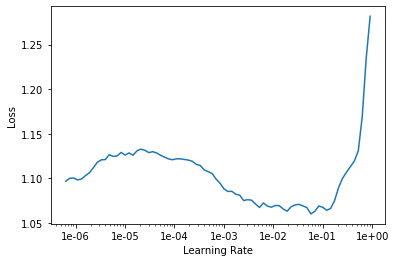

In [507]:
learn.recorder.plot()

In [511]:
learn.fit(1, 1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,1.112446,1.058043,0.481481,01:04
